# Normal Equation

In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)

In [3]:
y = 4+3*X+np.random.randn(100,1)

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')

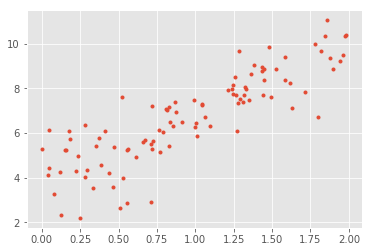

In [5]:
plt.plot(X,y,'.')

In [6]:
X_b = np.c_[np.ones((100,1)),X]

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()

In [9]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([ 3.7854772]), array([[ 3.04346664]]))

# Gradient Descent

## Batch Gradient Descent

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [12]:
theta = np.random.randn(2,1) # random initialization

In [13]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[ 3.7854772 ],
       [ 3.04346664]])

## Stochastic Gradient Descent

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [16]:
def learning_schedule(t):
    return t0/(t+t1)

In [17]:
theta = np.random.randn(2,1) # random initialization

In [18]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[ 3.82998756],
       [ 3.06527646]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/home/jfyu/anaconda2/envs/mlbook/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.81534804]), array([ 3.07240852]))

## Mini-Batch Gradient Descent

# Polynomial Regression

In [22]:
#quadratic
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

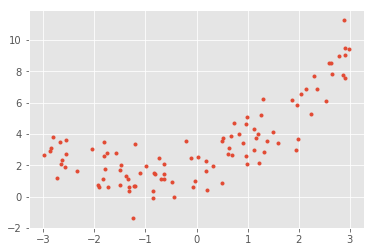

In [23]:
plt.plot(X,y,'.')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [25]:
X_poly = poly_features.fit_transform(X)

In [26]:
X[0]

array([ 2.35809505])

In [27]:
X_poly[0]

array([ 2.35809505,  5.56061228])

In [28]:
#X_poly now contains the original feature of X plus the square of this feature
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.83954169]), array([[ 1.01717522,  0.49070269]]))

this estimates y = 0.52x^2+0.998x+1.93

# Learning Curves

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3, label='val')

In [31]:
lin_reg = LinearRegression()

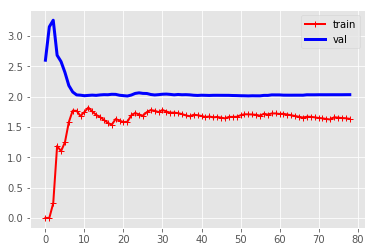

In [32]:
plot_learning_curves(lin_reg, X, y)
plt.legend()

This is underfitting: both curves have reached a plateau, and they are close and fairly high

In [33]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

(0, 3)

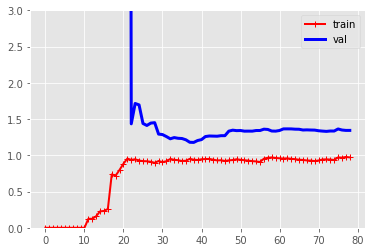

In [34]:
plot_learning_curves(polynomial_regression, X, y)
plt.legend()
plt.ylim([0,3])

# Regularized Linear Models

## Ridge Regression

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_reg = Ridge(alpha=1, solver = "cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

In [38]:
sgd_reg = SGDRegressor(penalty="l2", random_state=42)#it's l 2, not 12(number)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

/home/jfyu/anaconda2/envs/mlbook/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 1.13500145])

In [39]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 1.5507201]])

## Lasso

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

## Elastic Net

In [41]:
#this is a mixture of Lasso(L1 penalty) and Ridge (L2 penalty), mix ratio is r, which is the l1_ratio
#Preferred if there are a lot of features

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
elastic_net.predict(np.array([1.5]).reshape(-1,1))

array([ 1.54333232])

## Early Stopping

In [43]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate = 'constant', eta0=0.0005)

In [44]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [45]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [46]:
best_model, best_epoch

(SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True), 239)

In [47]:
best_model_adjust = best_model.set_params(max_iter=239,warm_start=False)

In [48]:
best_model_adjust

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=239, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [49]:
best_model_adjust.fit(X_train_poly_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=239, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [50]:
best_model_adjust.predict(X_val_poly_scaled)

array([ 2.83698408,  1.60301183,  1.76727712,  3.09558846,  1.80332497,
        2.17278339,  2.10539974,  2.15018358,  5.62942674,  3.26078901,
        1.64002634,  3.11145199,  2.57997471,  3.20164279,  1.89327878,
        2.41946877,  4.2258785 ,  1.78686984,  1.6305497 ,  2.18197029,
        8.74545313,  4.72984592,  8.82937757,  2.48758492,  2.00759143])

In [51]:
mean_squared_error(y_val_predict, y_val)

2.7022680977169422

In [52]:
minimum_val_error

1.351311051245387

In [53]:
val_error

2.7022680977169422

# Logistic Regression

## Decision Boundaries

In [54]:
from sklearn import datasets
iris = datasets.load_iris()

In [55]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [56]:
X = iris['data'][:,3:] #petal width
y = (iris['target'] ==2).astype(np.int) # 1 if Iris-Virginica, else 0

In [57]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
#look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [59]:
X_new

array([[ 0.        ],
       [ 0.003003  ],
       [ 0.00600601],
       [ 0.00900901],
       [ 0.01201201],
       [ 0.01501502],
       [ 0.01801802],
       [ 0.02102102],
       [ 0.02402402],
       [ 0.02702703],
       [ 0.03003003],
       [ 0.03303303],
       [ 0.03603604],
       [ 0.03903904],
       [ 0.04204204],
       [ 0.04504505],
       [ 0.04804805],
       [ 0.05105105],
       [ 0.05405405],
       [ 0.05705706],
       [ 0.06006006],
       [ 0.06306306],
       [ 0.06606607],
       [ 0.06906907],
       [ 0.07207207],
       [ 0.07507508],
       [ 0.07807808],
       [ 0.08108108],
       [ 0.08408408],
       [ 0.08708709],
       [ 0.09009009],
       [ 0.09309309],
       [ 0.0960961 ],
       [ 0.0990991 ],
       [ 0.1021021 ],
       [ 0.10510511],
       [ 0.10810811],
       [ 0.11111111],
       [ 0.11411411],
       [ 0.11711712],
       [ 0.12012012],
       [ 0.12312312],
       [ 0.12612613],
       [ 0.12912913],
       [ 0.13213213],
       [ 0

In [60]:
y_proba  = log_reg.predict_proba(X_new)

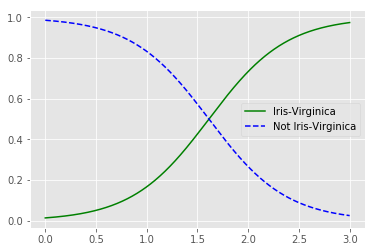

In [61]:
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0], 'b--',label='Not Iris-Virginica')
plt.legend()

## Softmax Regression

In [62]:
X = iris['data'][:,(2,3)]#petal length, petal width
y = iris['target']

In [63]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
softmax_reg.predict([[5,2]]) #5cm long and 2cm wide

array([2])

In [65]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134078e-07,   5.75276067e-02,   9.42471760e-01]])